In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
stress = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [5]:
stress.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
stress.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [7]:
rows = stress[pd.isna(stress["Sleep Disorder"])]
rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN


In [8]:
stress = stress.fillna("Nothing")
stress.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing


In [9]:
stress["BMI Category"] = stress["BMI Category"].replace("Normal Weight", "Normal")

In [10]:
duplicate_rows = stress[stress.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []


In [11]:
no_duplicates = stress.drop_duplicates(subset=['Person ID', 'Gender'])

In [12]:
stress['Stress Level'].value_counts()

,count
Stress Level,
3,71
8,70
4,70
5,67
7,50
6,46


In [13]:
dict = {}
for i in list(stress.columns):
    dict[i] = stress[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,3
Blood Pressure,25


In [14]:
stress['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
label_encoder=LabelEncoder()

In [17]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in cat_cols:
    stress[col] = label_encoder.fit_transform(stress[col])

stress.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,0,59,5,8.1,9,75,3,2,140/95,68,7000,2
373,374,0,59,5,8.1,9,75,3,2,140/95,68,7000,2


In [18]:
stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
stress[['Systolic BP', 'Diastolic BP']] = stress[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
stress = stress.drop('Blood Pressure', axis=1)

stress.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83


In [19]:
stress.drop('Person ID', axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

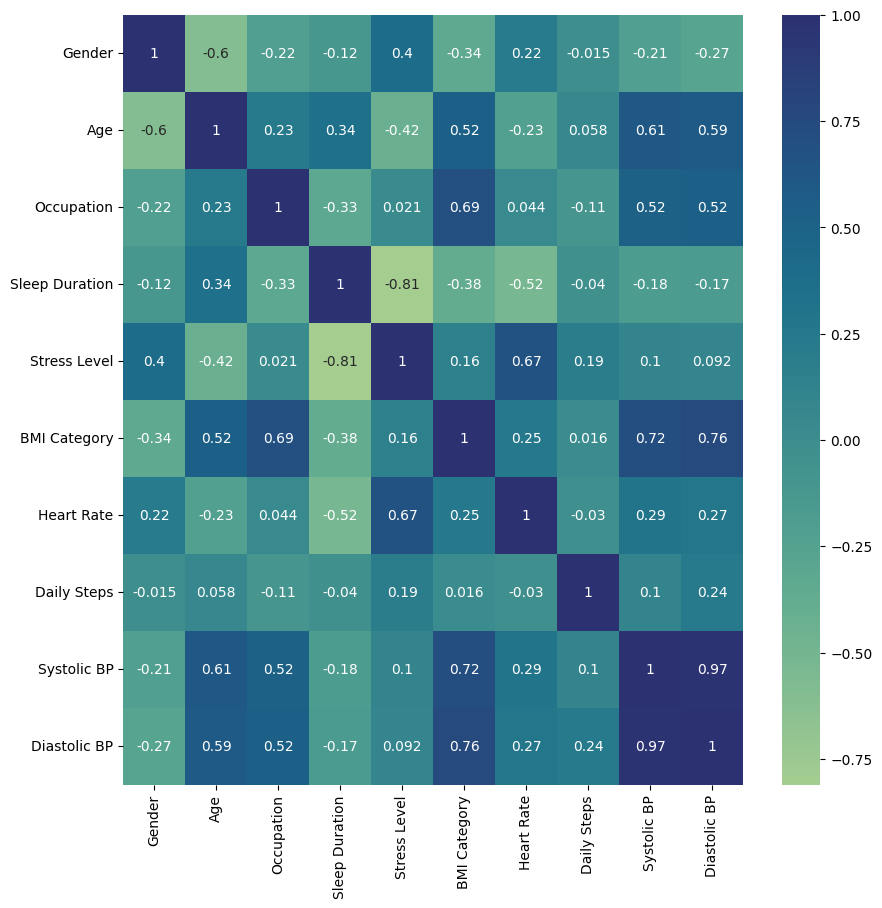

In [20]:
stress.drop('Sleep Disorder', axis=1, inplace=True)
stress.drop('Physical Activity Level', axis=1, inplace=True)
stress.drop('Quality of Sleep', axis=1, inplace=True)

#Plot the heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(stress.corr(), cmap = 'crest', annot = True)
plt.show

In [21]:
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Split the data into features (X) and the target variable (y)
X = stress.drop(['Stress Level'], axis=1)
y = stress['Stress Level']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (299, 9)
y_train shape: (299,)
X_test shape: (75, 9)
y_test shape: (75,)


In [25]:
X_train

,Gender,Age,Occupation,Sleep Duration,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
192,1,43,7,6.5,2,72,6000,130,85
75,1,33,1,6.0,0,72,5000,125,80
84,1,35,9,7.5,0,70,8000,120,80
362,0,59,5,8.2,2,68,7000,140,95
16,0,29,5,6.5,0,80,4000,132,87
...,...,...,...,...,...,...,...,...,...
71,1,33,1,6.1,0,72,5000,125,80
106,0,37,5,6.1,2,77,4200,126,83
270,0,49,5,6.1,2,75,10000,140,95
348,0,57,5,8.2,2,68,7000,140,95


In [26]:
random_forest = RandomForestClassifier(n_estimators=12)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12)

In [27]:
random_forest.score(X_test,y_test)

1.0

In [28]:
y_predict = random_forest.predict(X_test)


In [29]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [31]:
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print( "['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic Blood Pressure: "))
    diastolic_bp = int(input("Diastolic Blood Pressure: "))

    return np.array([[gender, age, occupation, sleep_duration, bmi_category, heart_rate, daily_steps, systolic_bp,diastolic_bp]])


user_input = get_user_input()

predicted_stress_level = random_forest.predict(user_input)

print("Predicted Stress Level:", predicted_stress_level[0])

Gender (Male: 1, Female: 0): 1
Age: 30
['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']
Occupation (encoded): 3
Sleep Duration (hours): 10
BMI Category (Underweight: 1, Normal: 2, Overweight: 3): 3
Heart Rate (bpm): 87
Daily Steps: 1000
Systolic Blood Pressure: 120
Diastolic Blood Pressure: 80
Predicted Stress Level: 3


In [32]:
import joblib

# Assume `random_forest` is your trained model
joblib.dump(random_forest, 'random_forest_model.pkl')

print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [ ]:
random_forest = joblib.load('random_forest_model.pkl')